# Artificial Neural Network Model for Classification

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

In [2]:
def imshow(image, title=None):
    plt.axis('off')
    plt.title(title)
    plt.imshow(image, 'gray')
    plt.show()
def showGridImage(images, labels, gsize=5,title=None):
    '''
    Function shows Multiple images.
    params: 
    images--> [Req] array of images flatten to 100*100
    labels --> [Req] array of labels (image class)
    gsize --> [opt, default=5] size for the grid gsize x gsize
    title --> [opt, default=None] title for the grid
    '''
    selected_indices = np.random.choice(len(images), size=gsize*gsize, replace=False)

    # Create a 5x5 grid for subplots
    fig, axes = plt.subplots(gsize,gsize, figsize=(10, 10))
    for i, ax in enumerate(axes.ravel()):
        index = selected_indices[i]
        image = images[index]
        label = labels[index]
        ax.imshow(image.reshape(100,100), 'gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"Image {classes[label]}")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

In [3]:
mainPath = './Dataset/'
classes = os.listdir(mainPath)
images = []
labels = []
for cls in classes:
    clsPath = os.path.join(mainPath,cls)
    for imgName in os.listdir(clsPath):
        imgPath = os.path.join(clsPath, imgName)
        image = cv2.imread(imgPath, 0)
        image = cv2.resize(image, (100,100))
        images.append(image.flatten())
        label = classes.index(cls)
        labels.append(label)

In [4]:
classes

['Car', 'Cricket ball', 'Digit', 'Ice cream cone']

In [5]:
len(images), len(labels)

(1447, 1447)

## Converting to numpy arrays

In [6]:
images = np.array(images)
labels = np.array(labels)

In [7]:
data = pd.DataFrame(images)
data

0     1     2     3     4     5     6     7     8     9     ...  9990  \
0      255   255   255   255   255   255   255   255   255   255  ...   255   
1      183   185   186   186   190   192   195   199   201   202  ...    83   
2       43    65    64    49    48    53    50    36    44    46  ...   145   
3      180   180   174   176   173   172   160    65    36    37  ...   113   
4      103    21    15    17    49   112   108   119    78    14  ...   144   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1442   117   116   115   117   117   117   117   116   116   117  ...    96   
1443    97    96    97   100   109   123   136   147   153   161  ...   170   
1444   255   255   255   255   255   255   255   255   255   255  ...   255   
1445   255   255   255   255   255   255   255   255   255   255  ...   255   
1446   255   255   255   255   255   255   255   255   255   255  ...   255   

      9991  9992  9993  9994  9995  9996  9997  9998  9999  
0      255   255   255   255   255   255   255   255   255  
1       83    85    85    86    86    84    85    84    83  
2      149   158   156   162   158   146   151   153   149  
3      128   127   117   114   113   108   114   116   122  
4      121   136   133   151   148   122   144   137   141  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
1442    95    95    94    94    94    93    92    92    91  
1443   166   163   159   155   153   152   150   150   148  
1444   255   255   255   255   255   255   255   255   255  
1445   255   255   255   255   255   255   255   255   255  
1446   255   255   255   255   255   255   255   255   255  

[1447 rows x 10000 columns]

### Showing few random images from dataset

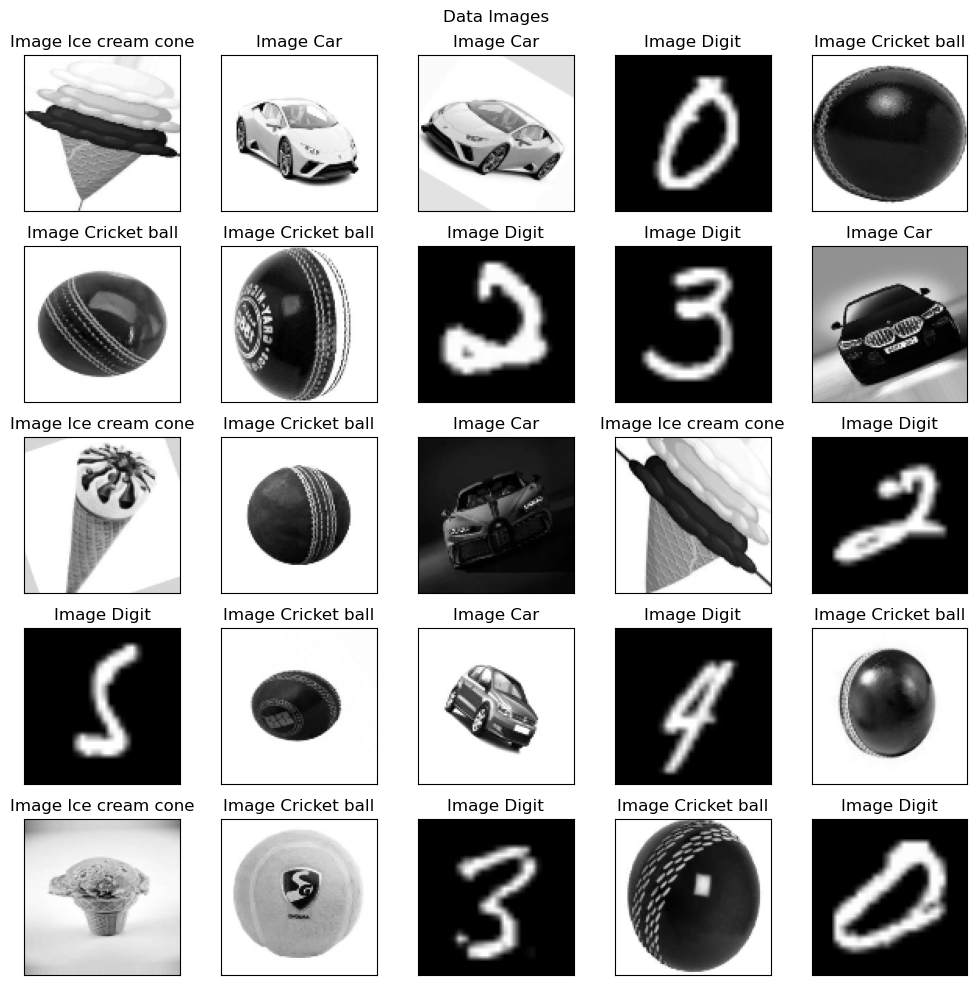

In [8]:
showGridImage(images,labels ,5, 'Data Images')

### splitting the dataset into train and test data
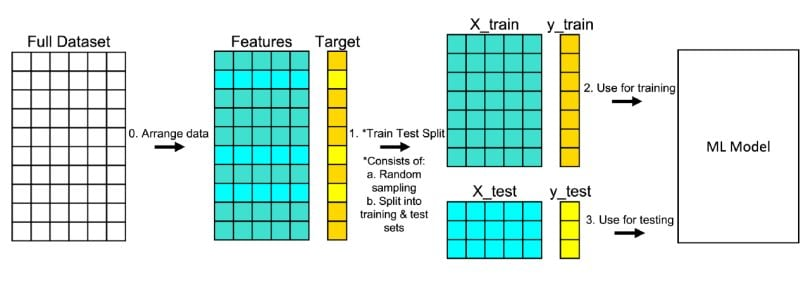

In [9]:
xTrain, xTest, yTrain, yTest = train_test_split(images, labels, test_size=0.2, random_state=0)

In [10]:
xTrain.shape[1]

10000

In [11]:
# Build the ANN model
model = Sequential([
    Dense(100, activation='relu', input_shape=(xTrain.shape[1],)),
    Dense(4, activation='softmax')
])

model.summary()

c:\Users\PC\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │     1,000,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           404 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,000,504 (3.82 MB)

 Trainable params: 1,000,504 (3.82 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(xTrain, yTrain, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.6052 - loss: 579.9756 - val_accuracy: 0.7845 - val_loss: 47.7675
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7188 - loss: 145.2991 - val_accuracy: 0.6121 - val_loss: 160.0617
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7728 - loss: 66.0667 - val_accuracy: 0.7112 - val_loss: 144.1771
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7538 - loss: 75.9128 - val_accuracy: 0.8147 - val_loss: 35.0142
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7957 - loss: 51.9744 - val_accuracy: 0.8879 - val_loss: 19.4837
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8454 - loss: 25.0766 - val_accuracy: 0.6897 - val_loss: 88.8686
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7930 - loss: 64.6587 - val_accuracy: 0.8362 - val_loss: 34.8392
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7956 - loss: 53.8117 - val_a

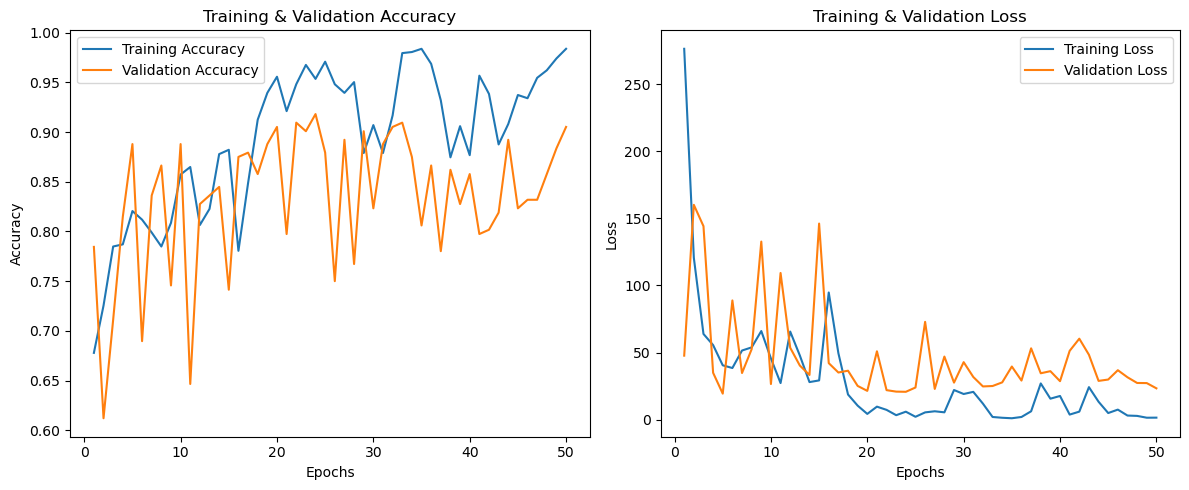

In [14]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)  # Create epoch count

# Plot Training & Validation Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Prediction of Test Data

In [15]:
predsClasses = model.predict(xTest)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


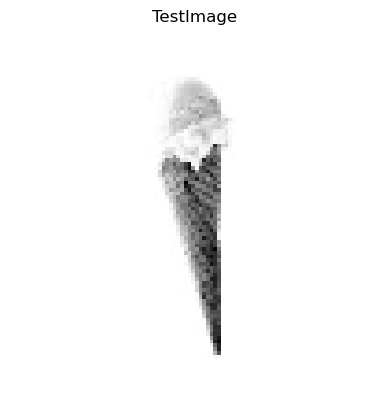

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


In [16]:
imshow(xTest[70].reshape(100,100), 'TestImage')
# Reshape the input for prediction
image_for_prediction = xTest[50].reshape(1, -1)

ModelPrediction = model.predict(image_for_prediction)

In [17]:
predicted_labels = np.argmax(predsClasses, axis=1)

classes[predicted_labels[70]]

'Ice cream cone'

### Evaluating the model
    1. Train Accuracy
    2. Test Accuracy

In [18]:
loss, trainAccuracy = model.evaluate(xTrain, yTrain)
testLoss, testAccuracy = model.evaluate(xTest, yTest)

print(f'Training Accuracy: {trainAccuracy*100:.2f}%')
print(f'Test Accuracy: {testAccuracy*100:.2f}%')

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9893 - loss: 0.9734 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8918 - loss: 33.8787 
Training Accuracy: 97.41%
Test Accuracy: 87.59%


## Confusion matrix

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


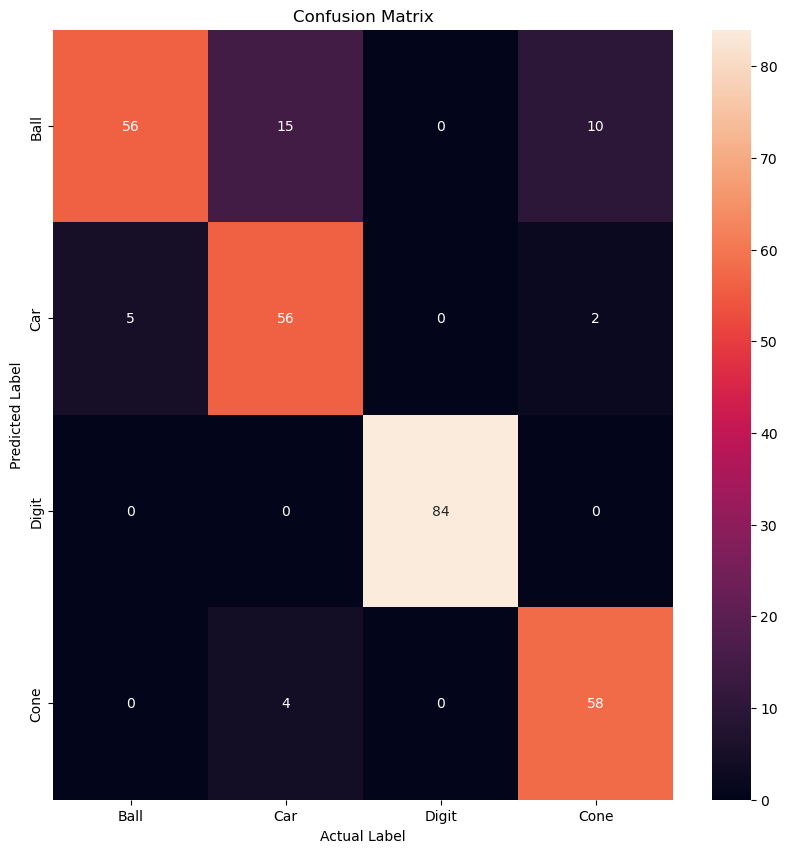

In [19]:
y_pred = np.argmax(model.predict(xTest), axis=1)
cm = confusion_matrix(yTest, y_pred)

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, xticklabels=['Ball', 'Car', 'Digit', 'Cone'],
            yticklabels=['Ball', 'Car', 'Digit', 'Cone'])
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

### Showing images with model predicted Class 

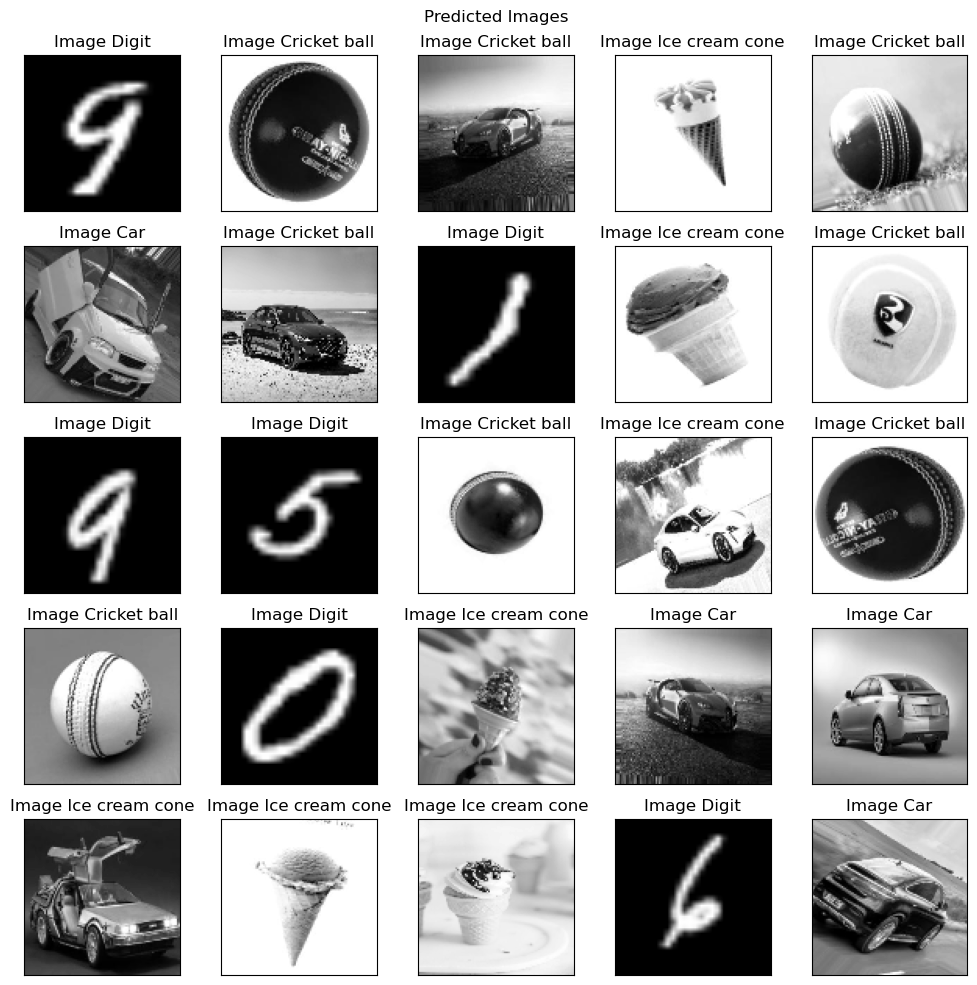

In [20]:
# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predsClasses, axis=1)
showGridImage(xTest, predicted_labels, 5, 'Predicted Images')

---